%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Here we plot the weight difference 2D figure of Updx-Updy


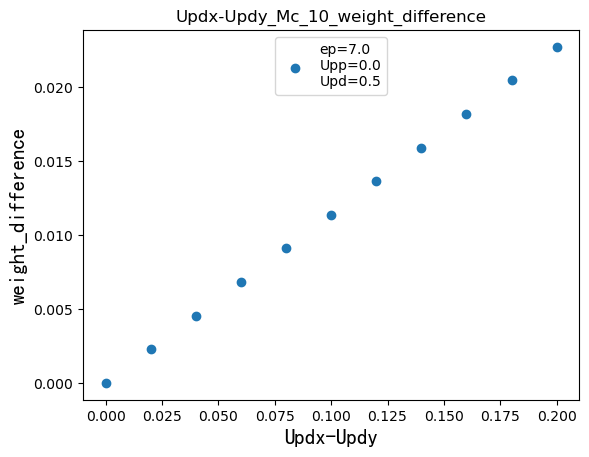

In [1]:
%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *
import scipy as sp
from scipy.optimize import leastsq
from scipy.interpolate import Rbf  # radial basis functions
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

def adjust_array_length(a, desired_length):
    start = a[0]
    end = a[-1]
    adjusted_array = np.linspace(start, end, desired_length)
    return adjusted_array

def take_between_values_inclusive(arr, target_value1, target_value2):
    mask = (arr >= target_value1) & (arr <= target_value2)
    result_array = arr[mask]
    return result_array



ed = 0
tpd = 1.5
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.0
B = 0.15
C = 0.58

ep_avgs1 = np.arange(0.0, 6.49, 0.5)
ep_avgs2 = np.arange(6.5, 8.99, 0.1)
ep_avgs3 = np.arange(9.00,12.01 , 0.5)
eps=np.hstack((np.hstack((ep_avgs1, ep_avgs2)),ep_avgs3))
difs = np.arange(0.0, 0.051, 0.005) 
# eps = np.arange(3.5, 3.51, 1) 
# difs = np.arange(0, 0.051, 0.005) 

Upps = np.arange(0, 4.01, 0.2) 
Udifs = np.arange(-0.0, 1.01, 0.1)

Vpps = np.arange(0.0, 0.01, 0.1)

Upds = np.arange(0.0,0.11,0.01)
Updfs = np.arange(-0.0,0.101,0.01)


Norb = 7
Mc = 10
eta = 0.2

fixed_ep = 7.0
fixed_Upp = 0.0
fixed_Upd = 0.5

All_labels = ('Udif','Updf','dif')
All_axis_names = ('Uppx-Uppy','Updx-Updy','epx-epy')
X = All_labels[1]
axisX = All_axis_names[1]
Idx  = ['0.0']*6

for  i in All_labels:
    if X==i:
        Idx[All_labels.index(i)]='XX'
print('Here we plot the weight difference 2D figure of',axisX)
Xi = []
Yi = []
for XX in eval(X+'s'):
    XX = round(XX,4)
    if Norb==7:
        ff = 'GS_weights_Norb7_tpp'+str(tpp)+'_diff'+str(eval(Idx[2]))+'_Upp'+str(fixed_Upp)+'_Udif'+str(eval(Idx[0])) \
             +'_Vpp'+str(0.0)+'_Upd'+str(fixed_Upd)+'_Updf'+str(eval(Idx[1]))+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
    if Norb==9 or Norb==11:
        ff = 'GS_weights_'+'Norb'+str(Norb)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_diff'+str(eval(Idx[2]))+\
             '_Upp'+str(fixed_Upp)+'_Udif'+str(eval(Idx[0]))+'_Vpp'+str(0.0)+'_Upd'+str(fixed_Upd)+\
             '_Updf'+str(eval(Idx[1]))+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
    c = loadtxt('./data_GS/'+ff,skiprows=0)
    if Norb==9 or Norb==11:
        c = np.delete(c, 3, axis=1)
    if c.ndim==1:
        if (c[1]+c[2])*0.5==fixed_ep:
            Xi.append(XX)
            Yi.append(abs(c[11]-c[17]))
        else:
            print('There is no ep=3.5 data in the file.')
    else:
        for i in range(len(c)):
            if c[i,1]+c[i,2]==fixed_ep*2:
                Xi.append(XX)
                Yi.append(abs(c[i,11]-c[i,17]))
                break
fig = plt.scatter(list(np.array(Xi)*2),Yi)
plt.xlabel(axisX, fontproperties='simHei', fontsize=15)
plt.ylabel('weight_difference', fontproperties='simHei', fontsize=15)
plt.legend(labels=['ep='+str(fixed_ep)+'\nUpp'+'='+str(fixed_Upp)+'\nUpd'+'='+str(fixed_Upd)],loc=9)
plt.title(axisX+'_Mc_'+str(Mc)+'_weight_difference')
savefig(axisX+'_ep'+str(fixed_ep)+'_Upp'+str(fixed_Upp)+'_Upd'+str(fixed_Upd)+'_Mc'+str(Mc)+'_2D_weight_difference'+'.pdf')